<a href="https://colab.research.google.com/github/Aamera09/Grip-ML/blob/main/Pred_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction using Supervised ML**
In this task we will see how machine learning can be used to implement linear regression involving two variables.

### **Simple Linear Regression (Problem Statement)**
The aim is to predict the percentage that a student is expected to score based upon the number of hours they studied.

### Author: Aamera Shaikh

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading data from csv file
path= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(path)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##**Looking for Missing (Null) Values**
Let us check if our data has any missing figures.

In [3]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values found.

## **Understanding the Dataset**


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above table we found that the mean of the hours is 5.012 and it's coreesponding score value is 51.480

## **Finding the relationship between the two variables by plotting a Graph**

Plotting the data with a help of a graph to find relationship between hours and scores.

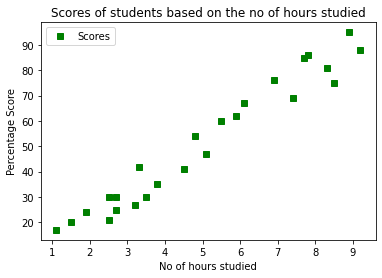

In [5]:
#Plotting the data
df.plot('Hours','Scores',style='s', c='green')
plt.xlabel('No of hours studied')
plt.ylabel('Percentage Score')
plt.title('Scores of students based on the no of hours studied')
plt.show()


From the above graph we can infere that there is a positive linear realtion between no of hours studied and percentage of score

### **Preparing the data**
Now we'll divide the data into attributes(inputs) and labels(outputs).

In [6]:
X= df.iloc[:, :-1].values
y=df.iloc[:, 1].values


##**Spliting the data into training and test sets by using Scikit-Learn's built-in train_test_split()**

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.1, random_state=0) 

### **Training the dataset and Implementing Linear Regression**




In [8]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train)
print("Trained")

Trained


The graph of the two variables is represented by a line
The equation of the line is represented as y=mX+c 
*where x depends on y
*m is the slope of the line
*c stands for y-intercept

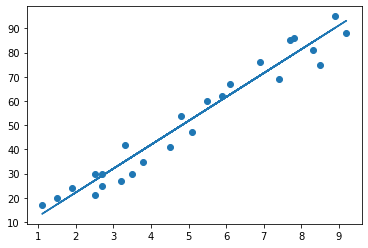

In [9]:
#Plotting the regression line
line = reg.coef_*X+reg.intercept_ ## coef stands for slope(m) and intercept stands for y-intercept(c)

#Plotting test data
plt.scatter(X,y)
plt.plot(X,line);
plt.show()


###**Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]]


In [11]:
# Comparing Actual values and Predicted values
df_ = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_
difference=df_
difference['Difference']=df_['Actual']-df_['Predicted']
difference

,Actual,Predicted,Difference
0,20,17.302210,2.697790
1,27,34.055294,-7.055294
2,69,75.445267,-6.445267


In [12]:
# You can also test with your own data
hours = 9.25
own_pred = reg.predict(np.array([hours]).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.67656425238496


###**Evaluating the model**
Evaluate the performance of algorithm using Root Mean Square.


In [13]:
from sklearn import metrics
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.3994503136120064
